## Situação: Automatizando a Análise de Despesas Mensais
Imagine que você trabalha em uma empresa de consultoria financeira e, todo mês, recebe um relatório de despesas em formato de tabela (CSV ou Excel). Seu objetivo é extrair os dados, organizar em uma planilha Excel e gerar gráficos automaticamente.

Fazer isso manualmente é demorado e sujeito a erros. Com o código abaixo, você automatiza todo o processo!

## Instale as dependências necessárias
Vamos usar as seguintes bibliotecas:
- `pandas`: manipulação de dados
- `openpyxl`: salvar arquivos Excel
- `matplotlib`: gráficos

In [5]:
%pip install pandas openpyxl matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Gerar um arquivo CSV de exemplo com uma tabela de despesas
Se você já tem um arquivo CSV ou Excel, pode pular esta etapa. Caso contrário, execute o código abaixo para criar um CSV fictício chamado `relatorio.csv`.

In [6]:
import pandas as pd

dados = [
    ["Janeiro", "Aluguel", 2000],
    ["Janeiro", "Energia", 450],
    ["Janeiro", "Internet", 120],
    ["Janeiro", "Salários", 5000],
    ["Janeiro", "Outros", 300],
    ["Fevereiro", "Aluguel", 2000],
    ["Fevereiro", "Energia", 470],
    ["Fevereiro", "Internet", 120],
    ["Fevereiro", "Salários", 5000],
    ["Fevereiro", "Outros", 250]
]

df_exemplo = pd.DataFrame(dados, columns=["Mês", "Categoria", "Despesa (R$)"])
df_exemplo.to_csv("relatorio.csv", index=False)
print("CSV de exemplo gerado: relatorio.csv")

CSV de exemplo gerado: relatorio.csv


## Ler a tabela do CSV para um DataFrame
Agora vamos ler os dados do CSV gerado (ou do seu arquivo real) usando o `pandas`.

In [7]:
import pandas as pd

df = pd.read_csv("relatorio.csv")
df.head()

,Mês,Categoria,Despesa (R$)
0,Janeiro,Aluguel,2000
1,Janeiro,Energia,450
2,Janeiro,Internet,120
3,Janeiro,Salários,5000
4,Janeiro,Outros,300


## Salvar os dados em Excel
Vamos salvar os dados em um arquivo Excel para facilitar o compartilhamento.

In [8]:
df.to_excel("relatorio.xlsx", index=False)
df.head()

,Mês,Categoria,Despesa (R$)
0,Janeiro,Aluguel,2000
1,Janeiro,Energia,450
2,Janeiro,Internet,120
3,Janeiro,Salários,5000
4,Janeiro,Outros,300


## Visualizar as despesas por categoria
Vamos criar um gráfico de barras mostrando o total de despesas por categoria.

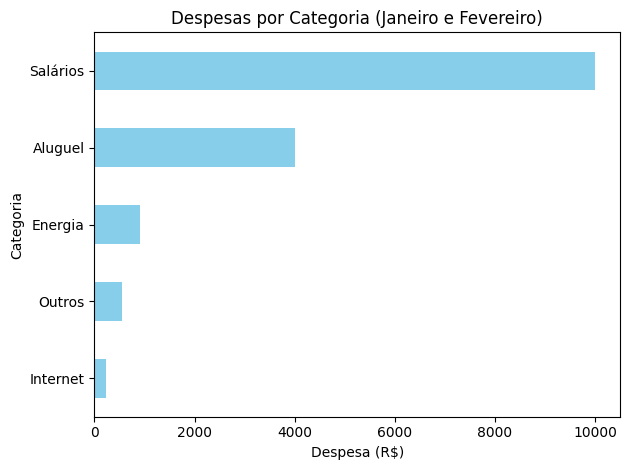

In [9]:
import matplotlib.pyplot as plt

totais = df.groupby("Categoria")["Despesa (R$)"].sum().sort_values()
totais.plot(kind="barh", color="skyblue")
plt.title("Despesas por Categoria (Janeiro e Fevereiro)")
plt.xlabel("Despesa (R$)")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()

## Exemplo: Lendo uma tabela de um PDF usando pdfplumber
Se você realmente precisa extrair tabelas de um PDF, a biblioteca mais simples e fácil de instalar é o `pdfplumber`.

Abaixo, criamos um PDF de exemplo (com `reportlab`) e mostramos como extrair a tabela usando `pdfplumber` e converter para DataFrame.

In [10]:
%pip install pdfplumber reportlab

  Using cached pypdfium2-4.30.0-py3-none-win_amd64.whl.metadata (48 kB)
  Using cached charset_normalizer-3.4.3-cp313-cp313-win_amd64.whl.metadata (37 kB)
  Using cached cffi-1.17.1-cp313-cp313-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.6 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.6 MB 818.5 kB/s eta 0:00:07
   --- ------------------------------------ 0.5/5.6 MB 818.5 kB/s eta 0:00:07
   --- ------------------------------------ 0.5/5.6 MB 818.5 kB/s eta 0:00:07
   ----- ---------------------------------- 0.8/5.6 MB 555.3 kB/s eta 0:00:09
   ----- ---------------------------------- 0.8/5.6 MB 555.3 kB/s eta 0:00:09
   ----- ---------------------------------- 0.8/5.6 MB 555.3 kB/s eta 0:00:09
   ----- ----------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors

dados = [
    ["Mês", "Categoria", "Despesa (R$)"],
    ["Janeiro", "Aluguel", "2000"],
    ["Janeiro", "Energia", "450"],
    ["Janeiro", "Internet", "120"],
    ["Janeiro", "Salários", "5000"],
    ["Janeiro", "Outros", "300"],
    ["Fevereiro", "Aluguel", "2000"],
    ["Fevereiro", "Energia", "470"],
    ["Fevereiro", "Internet", "120"],
    ["Fevereiro", "Salários", "5000"],
    ["Fevereiro", "Outros", "250"]
]

pdf = SimpleDocTemplate("relatorio_pdfplumber.pdf", pagesize=letter)
tabela = Table(dados)
tabela.setStyle(TableStyle([
    ("BACKGROUND", (0,0), (-1,0), colors.grey),
    ("TEXTCOLOR", (0,0), (-1,0), colors.whitesmoke),
    ("ALIGN", (0,0), (-1,-1), "CENTER"),
    ("FONTNAME", (0,0), (-1,0), "Helvetica-Bold"),
    ("BOTTOMPADDING", (0,0), (-1,0), 12),
    ("BACKGROUND", (0,1), (-1,-1), colors.beige),
    ("GRID", (0,0), (-1,-1), 1, colors.black)
]))
pdf.build([tabela])
print("PDF de exemplo gerado: relatorio_pdfplumber.pdf")

PDF de exemplo gerado: relatorio_pdfplumber.pdf


In [12]:
import pdfplumber
import pandas as pd

with pdfplumber.open("relatorio_pdfplumber.pdf") as pdf:
    pagina = pdf.pages[0]
    tabela = pagina.extract_table()

df_pdf = pd.DataFrame(tabela[1:], columns=tabela[0])
df_pdf["Despesa (R$)"] = df_pdf["Despesa (R$)"].astype(float)
df_pdf.head()

,Mês,Categoria,Despesa (R$)
0,Janeiro,Aluguel,2000.0
1,Janeiro,Energia,450.0
2,Janeiro,Internet,120.0
3,Janeiro,Salários,5000.0
4,Janeiro,Outros,300.0


## Exportar os dados extraídos do PDF para Excel
Agora vamos salvar o DataFrame extraído do PDF em um arquivo Excel, assim como fizemos com o CSV.

In [13]:
df_pdf.to_excel("relatorio_extraido_pdf.xlsx", index=False)
df_pdf.head()

,Mês,Categoria,Despesa (R$)
0,Janeiro,Aluguel,2000.0
1,Janeiro,Energia,450.0
2,Janeiro,Internet,120.0
3,Janeiro,Salários,5000.0
4,Janeiro,Outros,300.0


In [ ]:
vetor = []
dicionario = {
    
    
}

variavel = 1